In [3]:
from src import generator
from importlib import reload
import matplotlib.pyplot as plt


### Setting hyperparameters
- Number of trajectories: just for visualization below.
- Number of points: The number of points in the trajectories. The lower the number, the more sparse the trajectory.
- Min/Max in each axis: Limits the points to the given range
- Seed: a random seed to ensure reproducibility

In [8]:
# Number of trajectories:
number_of_trajectories = 8

# Number of points per trajectory:
number_of_points = 300

min_x = -20
max_x = 20
min_y = -5
max_y = 15
min_z = -10
max_z = 10

SEED = 429471

### Dynamic Trajectory
We instantiate the generator with the set parameters. We then call `dynamic.generate_next()` to get the next trajectory.
The remaining code is mainly for visualization.

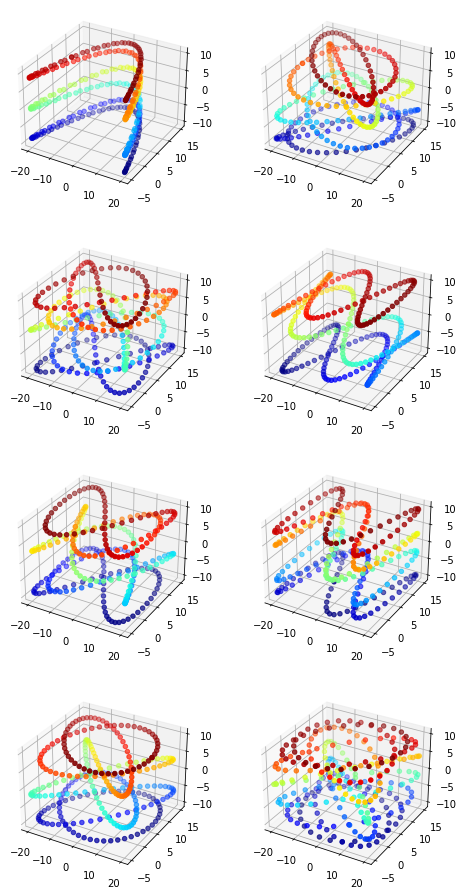

In [9]:
reload(generator)
dynamic = generator.DynamicTrajectory(min_x, max_x, min_y, max_y, min_z, max_z,seed=SEED,sequence_len=number_of_points)
fig = plt.figure(figsize=(8,number_of_trajectories*2))

for i in range(0, number_of_trajectories):
    # generate trajectory
    trajectory = dynamic.generate_next()

    # set up plot
    ax = plt.subplot(int(number_of_trajectories/2),2,i+1, projection='3d')
    cmjet = plt.get_cmap("jet")
    # plot
    ax.scatter(trajectory[:,0],trajectory[:,1],trajectory[:,2],c=trajectory[:,2],cmap=cmjet)


plt.savefig('lissajous.png', transparent=False, dpi=300)
plt.show()

### Static Trajectory

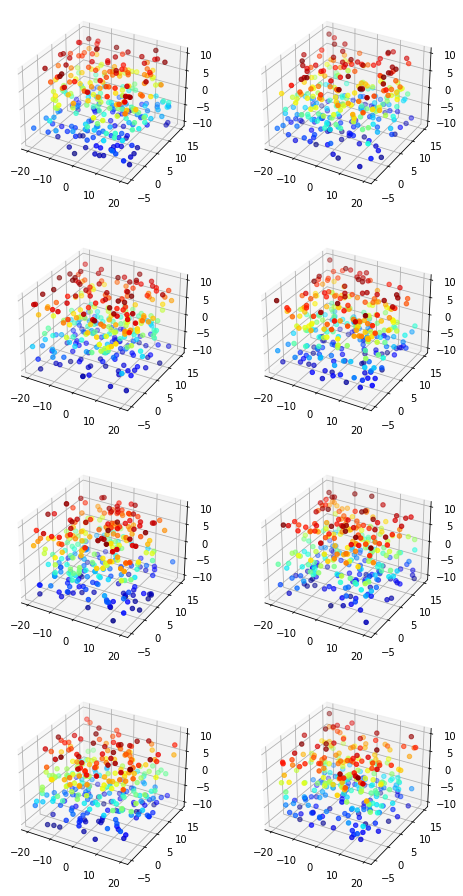

In [10]:
reload(generator)
static = generator.StaticTrajectory(min_x, max_x, min_y, max_y, min_z, max_z,seed=SEED,sequence_len=number_of_points)
fig = plt.figure(figsize=(8,number_of_trajectories*2))

for i in range(0, number_of_trajectories):
    # generate trajectory
    trajectory = static.generate_next()

    # set up plot
    ax = plt.subplot(int(number_of_trajectories/2),2,i+1, projection='3d')
    cmjet = plt.get_cmap("jet")
    # plot
    ax.scatter(trajectory[:,0],trajectory[:,1],trajectory[:,2],c=trajectory[:,2],cmap=cmjet)


plt.savefig('lissajous.png', transparent=False, dpi=300)
plt.show()
